<a href="https://colab.research.google.com/github/Victor0vich/Denis/blob/main/%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2_%D0%90%D0%BB%D1%8C%D1%84%D0%B0_%D0%91%D0%B0%D0%BD%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Какие бизнес-инсайты можно получить из анализа клиентских данных?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("Интенсив Альфа-Банк.csv")

## 0. Исследуем датасет

In [ ]:
df.columns

Index(['id', 'Сегмент', 'Срок жизни в Банке', 'Возраст ЮЛ',
       'CLTV (в данный момент)', 'CLTV Риск (в данный момент)',
       'CLTV Трнз (в данный момент)', 'CLTV Пассив (в данный момент)',
       'CLTV (ч-з N месяцев)', 'CLTV Риск (ч-з N месяцев)',
       'CLTV Трнз (ч-з N месяцев)', 'CLTV Пассив (ч-з N месяцев)',
       'Продукт A (в данный момент)', 'Продукт B (в данный момент)',
       'Продукт C (в данный момент)', 'Продукт D (в данный момент)',
       'Продукт E (в данный момент)', 'Продукт F (в данный момент)',
       'Продукт G (в данный момент)', 'Продукт A (ч-з N месяцев)',
       'Продукт B (ч-з N месяцев)', 'Продукт C (ч-з N месяцев)',
       'Продукт D (ч-з N месяцев)', 'Продукт E (ч-з N месяцев)',
       'Продукт F (ч-з N месяцев)', 'Продукт G (ч-з N месяцев)'],
      dtype='object')

In [ ]:
df.head().style

,id,Сегмент,Срок жизни в Банке,Возраст ЮЛ,CLTV (в данный момент),CLTV Риск (в данный момент),CLTV Трнз (в данный момент),CLTV Пассив (в данный момент),CLTV (ч-з N месяцев),CLTV Риск (ч-з N месяцев),CLTV Трнз (ч-з N месяцев),CLTV Пассив (ч-з N месяцев),Продукт A (в данный момент),Продукт B (в данный момент),Продукт C (в данный момент),Продукт D (в данный момент),Продукт E (в данный момент),Продукт F (в данный момент),Продукт G (в данный момент),Продукт A (ч-з N месяцев),Продукт B (ч-з N месяцев),Продукт C (ч-з N месяцев),Продукт D (ч-з N месяцев),Продукт E (ч-з N месяцев),Продукт F (ч-з N месяцев),Продукт G (ч-з N месяцев)
0,0,Высокий,3.333333,11.250000,11.941007,0.000000,6.524175,5.416832,6.301284,0.000000,4.767471,1.533813,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,Низкий,25.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Низкий,24.583333,24.583333,3.490223,0.000000,1.173297,2.316926,7.015647,0.000000,3.670084,3.345562,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,Средневысокий,25.000000,75.416667,79.430943,0.000000,31.791030,30.624925,47.524410,0.000000,28.802401,18.722009,1,0,1,0,0,0,0,1,0,1,0,0,0,0
4,4,Средний,23.333333,23.333333,69.388595,0.000000,34.918650,3.330362,21.088173,0.000000,8.166652,12.921522,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.dtypes

id                                 int64
Сегмент                           object
Срок жизни в Банке               float64
Возраст ЮЛ                       float64
CLTV (в данный момент)           float64
CLTV Риск (в данный момент)      float64
CLTV Трнз (в данный момент)      float64
CLTV Пассив (в данный момент)    float64
CLTV (ч-з N месяцев)             float64
CLTV Риск (ч-з N месяцев)        float64
CLTV Трнз (ч-з N месяцев)        float64
CLTV Пассив (ч-з N месяцев)      float64
Продукт A (в данный момент)        int64
Продукт B (в данный момент)        int64
Продукт C (в данный момент)        int64
Продукт D (в данный момент)        int64
Продукт E (в данный момент)        int64
Продукт F (в данный момент)        int64
Продукт G (в данный момент)        int64
Продукт A (ч-з N месяцев)          int64
Продукт B (ч-з N месяцев)          int64
Продукт C (ч-з N месяцев)          int64
Продукт D (ч-з N месяцев)          int64
Продукт E (ч-з N месяцев)          int64
Продукт F (ч-з N

In [ ]:
df.describe().style

,id,Срок жизни в Банке,Возраст ЮЛ,CLTV (в данный момент),CLTV Риск (в данный момент),CLTV Трнз (в данный момент),CLTV Пассив (в данный момент),CLTV (ч-з N месяцев),CLTV Риск (ч-з N месяцев),CLTV Трнз (ч-з N месяцев),CLTV Пассив (ч-з N месяцев),Продукт A (в данный момент),Продукт B (в данный момент),Продукт C (в данный момент),Продукт D (в данный момент),Продукт E (в данный момент),Продукт F (в данный момент),Продукт G (в данный момент),Продукт A (ч-з N месяцев),Продукт B (ч-з N месяцев),Продукт C (ч-з N месяцев),Продукт D (ч-з N месяцев),Продукт E (ч-з N месяцев),Продукт F (ч-з N месяцев),Продукт G (ч-з N месяцев)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.500000,12.161750,26.511000,6.411371,0.353938,3.079877,1.919486,7.818233,0.528577,3.146890,2.828646,0.657000,0.112500,0.030900,0.054500,0.028200,0.020700,0.083200,0.674800,0.111700,0.042100,0.063200,0.031500,0.021100,0.091500
std,2886.895680,11.582899,26.127457,15.074549,1.979190,6.795799,5.544233,18.678210,2.888911,6.943228,8.000489,0.474735,0.315996,0.173055,0.227013,0.165552,0.142385,0.276198,0.468473,0.315013,0.200827,0.243335,0.174673,0.143725,0.288333
min,0.000000,0.416667,0.416667,-0.188425,0.000000,-0.124839,0.000000,-0.684814,0.000000,-0.963117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.750000,3.333333,6.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4999.500000,7.916667,17.500000,0.107272,0.000000,0.006174,0.012130,0.447256,0.000000,0.148211,0.035995,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7499.250000,17.916667,37.916667,4.657594,0.000000,2.864939,0.757907,5.618028,0.000000,2.959266,1.169693,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9999.000000,46.250000,100.000000,79.430943,12.679878,34.918650,30.624925,100.000000,18.556262,36.269098,44.163028,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Посмотрим на распределение некоторых признаков**

In [ ]:
df[["Сегмент"]].value_counts()

Сегмент      
Низкий           6590
Средневысокий    1176
Высокий          1152
Средний          1082
Name: count, dtype: int64

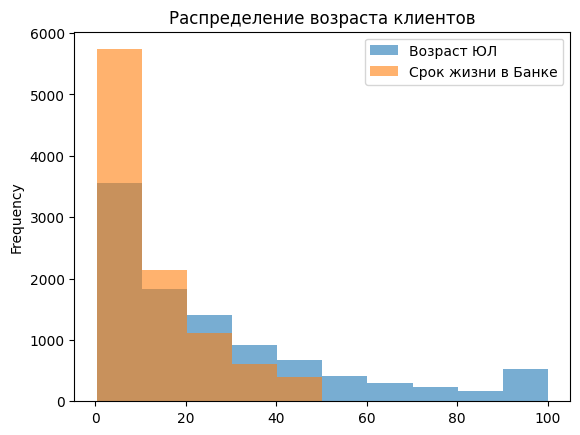

In [ ]:
df[["Возраст ЮЛ", "Срок жизни в Банке"]].plot(
    kind="hist", alpha=0.6, title="Распределение возраста клиентов"
);

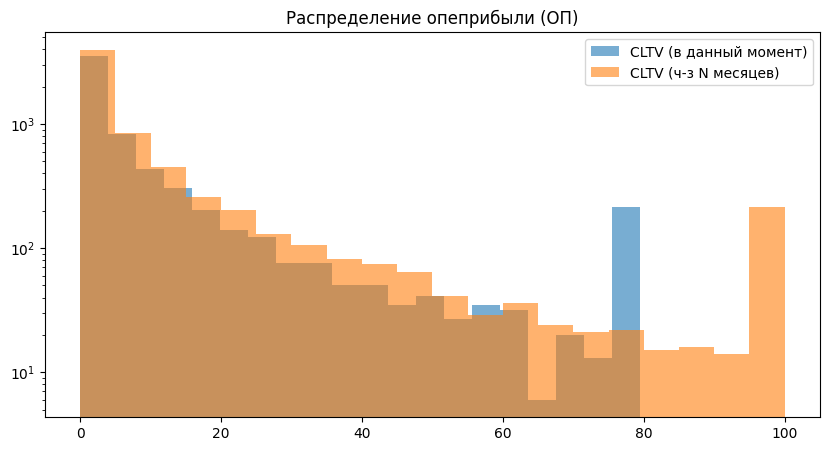

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(
    df[df["CLTV (в данный момент)"] > 0]["CLTV (в данный момент)"],
    alpha=0.6,
    bins=20,
    label="CLTV (в данный момент)",
    log=True,
)
plt.hist(
    df[df["CLTV (ч-з N месяцев)"] > 0]["CLTV (ч-з N месяцев)"],
    alpha=0.6,
    bins=20,
    label="CLTV (ч-з N месяцев)",
    log=True,
)
plt.title("Распределение опеприбыли (ОП)")
plt.legend()
plt.show()

## Блок 1. Какие можно придумать варианты оценки активности клиента?

### 1.1 Критерий активности на основе генерации положительной ОП

In [ ]:
df["Активность (в данный момент) v1"] = (df["CLTV (в данный момент)"] > 0).astype(int)
df["Активность (ч-з N месяцев) v1"] = (df["CLTV (ч-з N месяцев)"] > 0).astype(int)

In [ ]:
df[["Активность (в данный момент) v1", "Активность (ч-з N месяцев) v1"]].mean()

Активность (в данный момент) v1    0.6220
Активность (ч-з N месяцев) v1      0.6606
dtype: float64

### 1.2 Критерий активности на основе пользования продуктом

In [ ]:
products = ["A", "B", "C", "D", "E", "F", "G"]
df["Активность (в данный момент) v2"] = (
    df[[f"Продукт {p} (в данный момент)" for p in products]].sum(axis=1) > 0
).astype(int)
df["Активность (ч-з N месяцев) v2"] = (
    df[[f"Продукт {p} (ч-з N месяцев)" for p in products]].sum(axis=1) > 0
).astype(int)

In [ ]:
df[["Активность (в данный момент) v2", "Активность (ч-з N месяцев) v2"]].mean()

Активность (в данный момент) v2    0.6606
Активность (ч-з N месяцев) v2      0.6769
dtype: float64

In [ ]:
pd.DataFrame(
    df.groupby(["Активность (в данный момент) v1", "Активность (в данный момент) v2"])[
        "id"
    ].count()
)

id
Активность (в данный момент) v1 Активность (в данный момент) v2      
0                               0                                3378
                                1                                 402
1                               0                                  16
                                1                                6204

✨**Инсайты**✨:

- определять активность клиента можно разными способами, опираясь на потребность бизнеса; важно смотреть на показатели в динамике.
- критерий по генерации пложительной ОП более строгий


## Блок 2. От чего зависит будущее CLTV клиента

- сегмент

- возраст

- текущее CLTV

- клиент пришел в Банк сразу после регистрации

### 2.1 Сегмент

In [ ]:
df.groupby("Сегмент").agg(
    {
        "CLTV (в данный момент)": ["mean", "median"],
        "CLTV (ч-з N месяцев)": ["mean", "median"],
        "Активность (в данный момент) v2": "mean",
        "Активность (ч-з N месяцев) v2": "mean",
    }
)

CLTV (в данный момент)           CLTV (ч-з N месяцев)            \
                                mean    median                 mean    median   
Сегмент                                                                         
Высокий                    16.105361  2.719351            20.237013  3.256473   
Низкий                      2.667890  0.004942             3.319728  0.046714   
Средневысокий              14.152589  3.465290            17.114085  4.175952   
Средний                    10.476428  4.025159            11.891053  4.293193   

              Активность (в данный момент) v2 Активность (ч-з N месяцев) v2  
                                         mean                          mean  
Сегмент                                                                      
Высокий                              0.770833                      0.729167  
Низкий                               0.602883                      0.630804  
Средневысокий                        0.757653                      0.784014  
Средний                              0.789279                      0.785582

✨**Инсайты**✨:

- чем выше сегмент, тем больше ожидаемая доходность
- клиенты более высоких сегментов активнее
- клиенты высокого сегмента понижают активность, а низкого повышают

### 2.2 Возраст

In [ ]:
df[["Срок жизни в Банке", "CLTV (ч-з N месяцев)"]].corr()

,Срок жизни в Банке,CLTV (ч-з N месяцев)
Срок жизни в Банке,1.000000,0.191898
CLTV (ч-з N месяцев),0.191898,1.000000


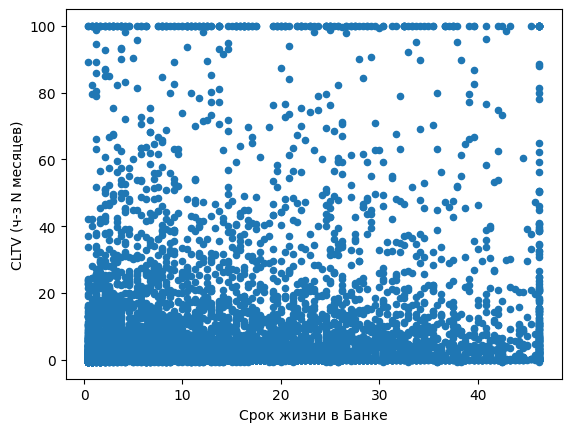

In [ ]:
df.plot("Срок жизни в Банке", "CLTV (ч-з N месяцев)", kind="scatter");

In [ ]:
df[["Возраст ЮЛ", "CLTV (ч-з N месяцев)"]].corr()

,Возраст ЮЛ,CLTV (ч-з N месяцев)
Возраст ЮЛ,1.000000,0.101331
CLTV (ч-з N месяцев),0.101331,1.000000


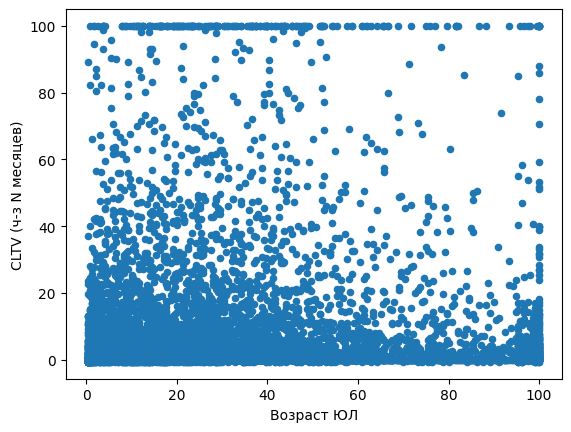

In [ ]:
df.plot("Возраст ЮЛ", "CLTV (ч-з N месяцев)", kind="scatter");

✨**Инсайты**✨:

- зависимость доходности от возраста низкая (связано с тем, что ОП рассчитывается не за весь срок жизни)

### 2.3 CLTV (в данный момент)

In [ ]:
df[["CLTV (в данный момент)", "CLTV (ч-з N месяцев)"]].corr()

,CLTV (в данный момент),CLTV (ч-з N месяцев)
CLTV (в данный момент),1.000000,0.799023
CLTV (ч-з N месяцев),0.799023,1.000000


✨**Инсайты**✨:

- наблюдается высокая зависимость оперприбыли ч-з N месяцев от опеприбыли в данный момент

### 2.4 Клиенты, которые пришли в банк в момент регистрации

In [ ]:
df["Новорег"] = (df["Срок жизни в Банке"] == df["Возраст ЮЛ"]).astype(int)

In [ ]:
df["Новорег"].mean()

0.3558

In [ ]:
df.groupby("Новорег").agg(
    {
        "CLTV (в данный момент)": ["mean", "median"],
        "CLTV (ч-з N месяцев)": ["mean", "median"],
        "Активность (в данный момент) v2": "mean",
        "Активность (ч-з N месяцев) v2": "mean",
    }
)

CLTV (в данный момент)           CLTV (ч-з N месяцев)            \
                          mean    median                 mean    median   
Новорег                                                                   
0                     6.821095  0.157193             8.443810  0.476192   
1                     5.669539  0.053309             6.685584  0.275408   

        Активность (в данный момент) v2 Активность (ч-з N месяцев) v2  
                                   mean                          mean  
Новорег                                                                
0                              0.679603                      0.688140  
1                              0.626194                      0.656549

✨**Инсайты**✨:

- CLTV и активность клиентам, которые пришли в Банк в момент регистрации - ниже

## Блок 3. Продуктовые сочетания

### 3.1 Клиенты с каким продуктом приносят больше дохода?

**Посмотрим на представленность продуктов**

In [ ]:
df[[f"Продукт {p} (в данный момент)" for p in products]].sum(axis=0)

Продукт A (в данный момент)    6570
Продукт B (в данный момент)    1125
Продукт C (в данный момент)     309
Продукт D (в данный момент)     545
Продукт E (в данный момент)     282
Продукт F (в данный момент)     207
Продукт G (в данный момент)     832
dtype: int64

In [ ]:
df.shape[0]

10000

✨**Инсайты**✨:

- продукты представлены в разном кол-ве
- A - самый популярный продукт (активен у 66% клиентов из выгрузки)
-
F - самый низкопредставленный проду (из имеющихся)кт

**Выделим продуктовые группы и посмотрим доходность**

In [ ]:
df_agg = (
    df.groupby([f"Продукт {p} (в данный момент)" for p in products])
    .agg(
        {
            "CLTV (в данный момент)": "mean",
            "CLTV Риск (в данный момент)": "mean",
            "CLTV Трнз (в данный момент)": "mean",
            "CLTV Пассив (в данный момент)": "mean",
            "id": "count",
        }
    )
    .reset_index()
)

**Есть большое кол-во редких продуктовых сочетаний**

In [ ]:
df_agg.sort_values("id", ascending=False).tail()

,Продукт A (в данный момент),Продукт B (в данный момент),Продукт C (в данный момент),Продукт D (в данный момент),Продукт E (в данный момент),Продукт F (в данный момент),Продукт G (в данный момент),CLTV (в данный момент),CLTV Риск (в данный момент),CLTV Трнз (в данный момент),CLTV Пассив (в данный момент),id
47,1,1,1,0,0,1,0,25.926059,12.679878,1.083701,3.038057,1
48,1,1,1,0,1,0,1,15.060667,0.000000,17.769495,2.345226,1
49,1,1,1,0,1,1,1,-0.188425,0.000000,6.328751,1.979266,1
5,0,0,0,1,0,1,0,-0.188425,0.000000,0.033395,0.000000,1
2,0,0,0,0,0,1,0,69.743346,12.679878,0.000000,0.000000,1


In [ ]:
df_agg[df_agg["id"] >= 50].sort_values("CLTV (в данный момент)", ascending=False)

,Продукт A (в данный момент),Продукт B (в данный момент),Продукт C (в данный момент),Продукт D (в данный момент),Продукт E (в данный момент),Продукт F (в данный момент),Продукт G (в данный момент),CLTV (в данный момент),CLTV Риск (в данный момент),CLTV Трнз (в данный момент),CLTV Пассив (в данный момент),id
9,1,0,0,0,0,1,0,31.080001,9.395443,5.345137,4.683109,79
20,1,0,1,0,0,0,1,29.837953,0.312738,8.320485,15.010048,94
19,1,0,1,0,0,0,0,21.883749,0.355571,6.149405,11.697760,136
8,1,0,0,0,0,0,1,17.411571,0.390997,6.556075,7.200624,474
38,1,1,0,1,0,0,1,15.774224,0.000000,9.384697,4.933616,50
11,1,0,0,0,1,0,0,12.840839,2.729636,6.778536,1.942310,110
37,1,1,0,1,0,0,0,8.958190,0.000000,6.008211,2.102745,303
7,1,0,0,0,0,0,0,6.537997,0.083809,3.867090,1.793234,4291
15,1,0,0,1,0,0,0,6.214790,0.073221,3.975042,1.512912,117
29,1,1,0,0,0,0,0,6.150945,0.048997,4.258653,1.492888,590


✨**Инсайты**✨:

- продукты с наибольшей ОП следующие: F, C, G
- с более низкой ОП: B, D, E

Хочется понять, что все-так это за продукты.

### 3.2 Как связано наличие определенных продуктов и наличие транзакционного/пассивного/рискового дохода

**Наиболее частые продуктовые сочетания**

- чаще всего встречается продукт А (можно сделать предположение, что это РКО - самый важный банковский продукт для ЮЛ)
- также распространенно сочетание с отсутствием каких-либо продуктов; это соответствует околонулевой ОП (ОП не нулевая, поскольку кроме выделенных в выгрузке продуктов есть еще другие, которые могут быть у клиента и генерировать ОП)

*Сопоставление продукта и типа ОП немного затрудняется тем, что у клиента, помимо выбранных для анализа продуктов, могут быть еще и другие продукты.* Поэтому будем сравнивать все относительно базовых кластеров - только РКО (продукт А) и без продуктов.

In [ ]:
df_agg.sort_values("id", ascending=False).head(10)

,Продукт A (в данный момент),Продукт B (в данный момент),Продукт C (в данный момент),Продукт D (в данный момент),Продукт E (в данный момент),Продукт F (в данный момент),Продукт G (в данный момент),CLTV (в данный момент),CLTV Риск (в данный момент),CLTV Трнз (в данный момент),CLTV Пассив (в данный момент),id
7,1,0,0,0,0,0,0,6.537997,0.083809,3.867090,1.793234,4291
0,0,0,0,0,0,0,0,0.165400,0.041096,0.000268,0.000285,3394
29,1,1,0,0,0,0,0,6.150945,0.048997,4.258653,1.492888,590
8,1,0,0,0,0,0,1,17.411571,0.390997,6.556075,7.200624,474
37,1,1,0,1,0,0,0,8.958190,0.000000,6.008211,2.102745,303
19,1,0,1,0,0,0,0,21.883749,0.355571,6.149405,11.697760,136
15,1,0,0,1,0,0,0,6.214790,0.073221,3.975042,1.512912,117
11,1,0,0,0,1,0,0,12.840839,2.729636,6.778536,1.942310,110
20,1,0,1,0,0,0,1,29.837953,0.312738,8.320485,15.010048,94
9,1,0,0,0,0,1,0,31.080001,9.395443,5.345137,4.683109,79


✨**Инсайты**✨:

- продукт A генерирует **Транзакционную и Пассивную** ОП
- продукт B, D увеличивают **Транзакционную** ОП (эквайринги?)
- продукт C существенно увеличивает **Пассивы** (депозиты?)
- продукты E, F - увеличивают **Рисковую** ОП (кредитные продукты?)
- продукт G имеет высокий прирост по всем типам ОП (здесь явный намек на структурный эффект)

### 3.3 Выделим клиентов, кто повышает/понижает продуктовое состояние

In [ ]:
df_all = []
for p in products:
    df_prod = (
        df.groupby([f"Продукт {p} (в данный момент)", f"Продукт {p} (ч-з N месяцев)"])
        .agg(
            {
                "CLTV (в данный момент)": "mean",
                "CLTV (ч-з N месяцев)": "mean",
                "id": "count",
            }
        )
        .reset_index()
    )
    df_prod.rename(
        columns={
            f"Продукт {p} (в данный момент)": "Наличие продукта (в данный момент)",
            f"Продукт {p} (ч-з N месяцев)": "Наличие продукта (ч-з N месяцев)",
        },
        inplace=True,
    )
    df_prod["abs_delta"] = (
        df_prod["CLTV (ч-з N месяцев)"] - df_prod["CLTV (в данный момент)"]
    )
    df_prod["rel_delta"] = (
        df_prod["CLTV (ч-з N месяцев)"] / df_prod["CLTV (в данный момент)"] - 1
    )
    df_prod["product"] = p
    df_all.append(df_prod)
df_all = pd.concat(df_all, ignore_index=True)
df_all.tail(4)

,Наличие продукта (в данный момент),Наличие продукта (ч-з N месяцев),CLTV (в данный момент),CLTV (ч-з N месяцев),id,abs_delta,rel_delta,product
24,0,0,4.846745,5.915751,8989,1.069006,0.220562,G
25,0,1,8.488218,15.249006,179,6.760788,0.796491,G
26,1,0,20.036228,15.880682,96,-4.155545,-0.207402,G
27,1,1,23.238391,28.195018,736,4.956627,0.213295,G


**Что происходит при закрытии продуктов**

<Axes: xlabel='product'>

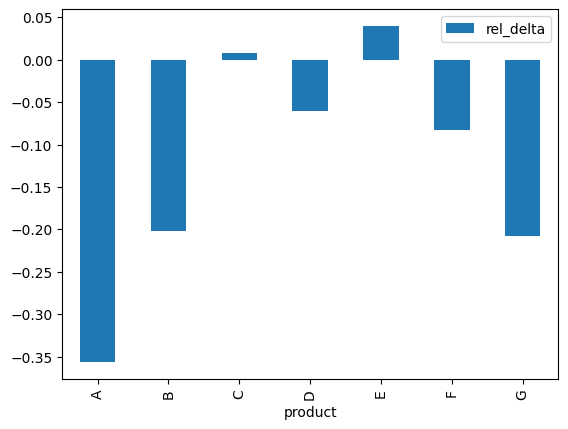

In [ ]:
df_all[
    (df_all["Наличие продукта (в данный момент)"] == 1)
    & (df_all["Наличие продукта (ч-з N месяцев)"] == 0)
].plot(x="product", y="rel_delta", kind="bar")

Закрытие продуктов C, E увеличивает ОП?

Для продукта С отклонение околонулевое

In [ ]:
df_all[(df_all["product"] == "C")]

,Наличие продукта (в данный момент),Наличие продукта (ч-з N месяцев),CLTV (в данный момент),CLTV (ч-з N месяцев),id,abs_delta,rel_delta,product
8,0,0,5.488912,6.653728,9526,1.164817,0.212213,C
9,0,1,19.877853,31.282245,165,11.404393,0.573724,C
10,1,0,30.566162,30.802808,53,0.236647,0.007742,C
11,1,1,27.056597,31.268747,256,4.212150,0.155679,C


Для продукта E прирост связан с существенным увеличением ОП даже при стабильном переходе.

In [ ]:
df_all[(df_all["product"] == "E")]

,Наличие продукта (в данный момент),Наличие продукта (ч-з N месяцев),CLTV (в данный момент),CLTV (ч-з N месяцев),id,abs_delta,rel_delta,product
16,0,0,5.936326,7.212223,9642,1.275897,0.214930,E
17,0,1,10.349870,18.987234,76,8.637364,0.834538,E
18,1,0,17.329590,18.014574,43,0.684984,0.039527,E
19,1,1,22.359400,26.880419,239,4.521019,0.202198,E


**Что происходит при открытии продуктов**

<Axes: xlabel='product'>

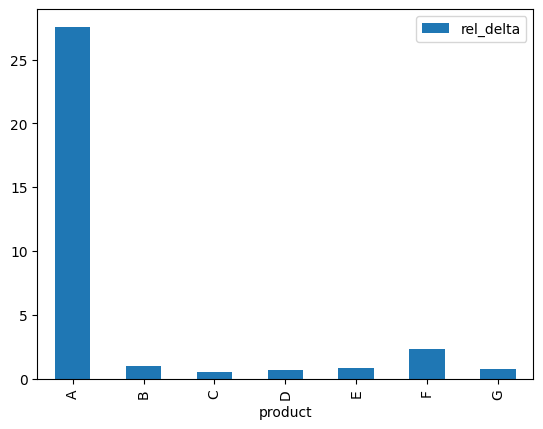

In [ ]:
df_all[
    (df_all["Наличие продукта (в данный момент)"] == 0)
    & (df_all["Наличие продукта (ч-з N месяцев)"] == 1)
].plot(x="product", y="rel_delta", kind="bar")

<Axes: xlabel='product'>

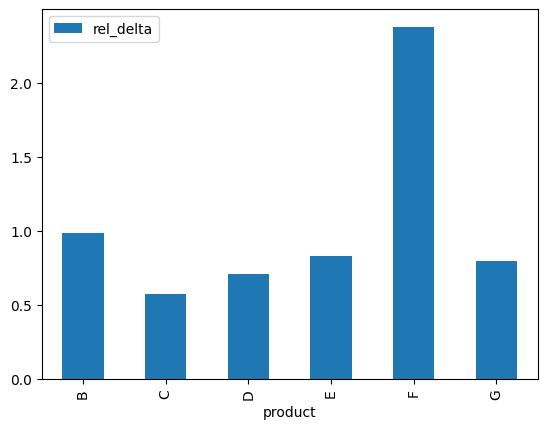

In [ ]:
df_all[
    (df_all["Наличие продукта (в данный момент)"] == 0)
    & (df_all["Наличие продукта (ч-з N месяцев)"] == 1)
    & (df_all["product"] != "A")
].plot(x="product", y="rel_delta", kind="bar")

✨**Инсайты**✨:

- закрытие/открытие продукта А существенным образом влияет на ОП
- открытие продукта F существеннм образом растит ОП
- закрытие продуктов B, G существенным образом снижает ОП

## Блок 4. Переходы и структурные взаимосвязи

На самом деле, продукты нужно смотреть не отдельно, а в сочетании.

### 4.1 Какие продуктовые переходы совершают клиенты

In [ ]:
df["start_cluster"] = df.apply(
    lambda x: "".join(
        (x[[f"Продукт {p} (в данный момент)" for p in products]] * products).values
    ),
    axis=1,
).replace({"": "churn"})
df["end_cluster"] = df.apply(
    lambda x: "".join(
        (x[[f"Продукт {p} (ч-з N месяцев)" for p in products]] * products).values
    ),
    axis=1,
).replace({"": "churn"})

In [ ]:
df[["start_cluster", "end_cluster"]].value_counts().head(20)

start_cluster  end_cluster
A              A              3429
churn          churn          2467
               A               684
A              churn           621
AB             AB              418
AG             AG              369
ABD            ABD             229
AC             AC              101
AE             AE               80
A              AG               79
               AC               74
ACG            ACG              74
AF             AF               60
churn          ABD              60
AB             A                57
AD             A                52
AB             ABD              49
churn          AD               47
AB             churn            45
churn          AB               43
Name: count, dtype: int64

✨**Инсайты**✨:
- клиенты могут оставаться в том же продуктовом кластере, повышать и понижать продуктовое состояние
- переходы, когда клиент преорбетает более одного продукта - встречаются редко
- большая часть переходов - стабильная

### 4.2 Структурные взаимосвязи

Сравним конкретные переходы А-А и А-АС.

Как мы выяснили ранее, продукт С - генерирует пассивную ОП. Давайте посмотрим, как изменится общая/рисковая/транзакционная/пассивная ОП при добавлении продукта, который может сгенерировать только рисковую прибыль.

In [ ]:
res1 = df[(df["start_cluster"] == "A") & (df["end_cluster"] == "A")].agg(
    {
        "CLTV (в данный момент)": "mean",
        "CLTV Риск (в данный момент)": "mean",
        "CLTV Трнз (в данный момент)": "mean",
        "CLTV Пассив (в данный момент)": "mean",
        "CLTV (ч-з N месяцев)": "mean",
        "CLTV Риск (ч-з N месяцев)": "mean",
        "CLTV Трнз (ч-з N месяцев)": "mean",
        "CLTV Пассив (ч-з N месяцев)": "mean",
        "id": "count",
    }
)
res2 = df[(df["start_cluster"] == "A") & (df["end_cluster"] == "AC")].agg(
    {
        "CLTV (в данный момент)": "mean",
        "CLTV Риск (в данный момент)": "mean",
        "CLTV Трнз (в данный момент)": "mean",
        "CLTV Пассив (в данный момент)": "mean",
        "CLTV (ч-з N месяцев)": "mean",
        "CLTV Риск (ч-з N месяцев)": "mean",
        "CLTV Трнз (ч-з N месяцев)": "mean",
        "CLTV Пассив (ч-з N месяцев)": "mean",
        "id": "count",
    }
)
res = pd.concat([res1, res2], axis=1)
res.columns = ["A-A", "A-AC"]
res = res.T
res

,CLTV (в данный момент),CLTV Риск (в данный момент),CLTV Трнз (в данный момент),CLTV Пассив (в данный момент),CLTV (ч-з N месяцев),CLTV Риск (ч-з N месяцев),CLTV Трнз (ч-з N месяцев),CLTV Пассив (ч-з N месяцев),id
A-A,6.837777,0.081374,4.091203,1.866850,7.851896,0.114333,4.005970,2.741735,3429.0
A-AC,18.382466,0.000000,8.225931,7.416422,32.932600,0.022105,10.427737,15.719269,74.0


In [ ]:
for name in ["CLTV", "CLTV Риск", "CLTV Трнз", "CLTV Пассив"]:
    res[f"abs_delta ({name})"] = (
        res[f"{name} (ч-з N месяцев)"] - res[f"{name} (в данный момент)"]
    )
    res[f"rel_delta ({name})"] = (
        res[f"{name} (ч-з N месяцев)"] / res[f"{name} (в данный момент)"] - 1
    )

In [ ]:
res.iloc[:, 8:]

,id,abs_delta (CLTV),rel_delta (CLTV),abs_delta (CLTV Риск),rel_delta (CLTV Риск),abs_delta (CLTV Трнз),rel_delta (CLTV Трнз),abs_delta (CLTV Пассив),rel_delta (CLTV Пассив)
A-A,3429.0,1.014119,0.148311,0.032959,0.405032,-0.085233,-0.020833,0.874885,0.468642
A-AC,74.0,14.550133,0.791522,0.022105,inf,2.201806,0.267666,8.302847,1.119522


✨**Инсайты**✨:
- клиенты, открывающие продукт С имеют изначально более высокий профиль доходности
- при добавлении только пассивного продукта увеличивается транзакционная ОП на 27%